In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("~/Desktop/weather.csv") 
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [3]:
data.shape

(366, 22)

In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [5]:
rainfall_mean=np.mean(data.Rainfall)
print(rainfall_mean)

1.4284153005464482


In [6]:
corelation = data.corr()

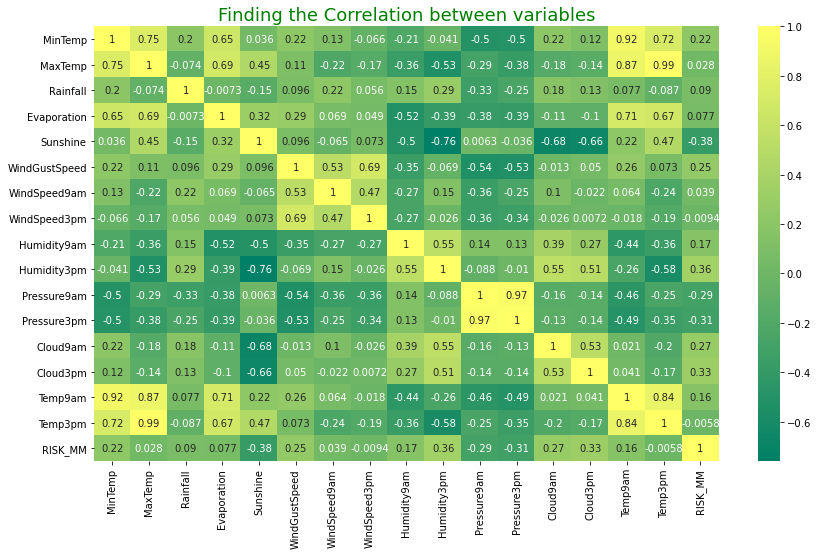

In [49]:
plt.figure(figsize=(14,8))
plt.title("Finding the Correlation between variables", fontsize = 18, color = 'green')
sns.heatmap(corelation,xticklabels= corelation.columns, yticklabels=corelation.columns,annot = True, cmap='summer')

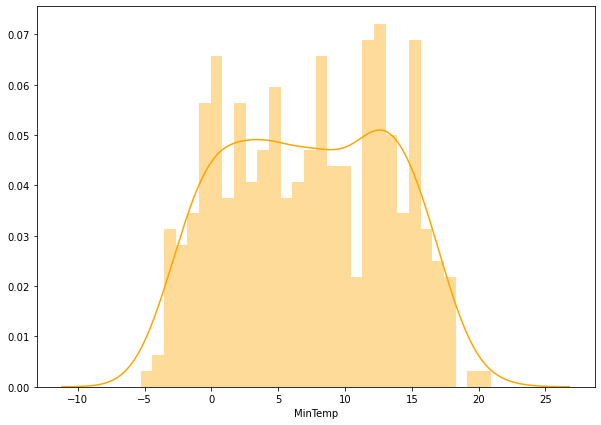

In [8]:
plt.figure(figsize=(10,7))
sns.distplot(data['MinTemp'], bins = 30,  color = 'orange')

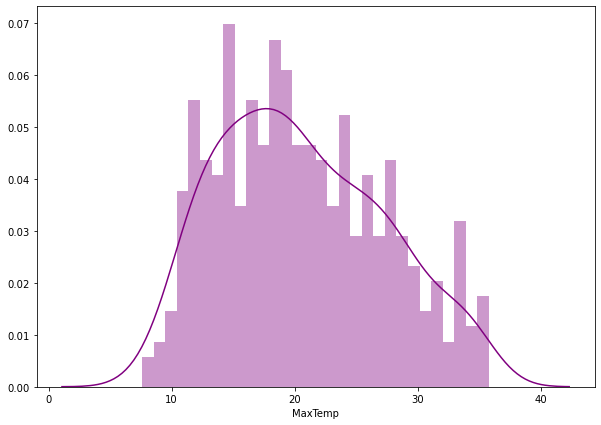

In [9]:
plt.figure(figsize=(10,7))
seabornInstance.distplot(data['MaxTemp'], bins = 30,  color = 'purple')

In [10]:
X = data['MinTemp'].values.reshape(-1,1)
y = data['MaxTemp'].values.reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
X_train.shape, y_train.shape 

((292, 1), (292, 1))

In [13]:
y_test.shape, y_test.shape 

((74, 1), (74, 1))

# Training the Linear Model

In [14]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


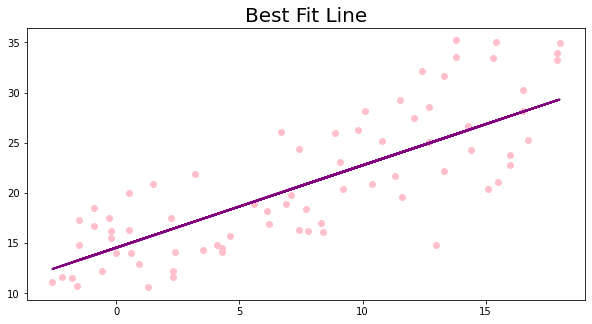

In [42]:
plt.figure(figsize=(10,5))
plt.title("Best Fit Line", fontsize = '20')
plt.scatter(X_test, y_test,  color='pink')
plt.plot(X_test, y_pred, color='Purple', linewidth=2)
plt.show()

# Interpreting Results
y = mx + c  (m is coefficient and c is intercept)

In [18]:
print('Y-Intercept(c):', regressor.intercept_)

print('slope of line (m)',regressor.coef_)

print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  

print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Y-Intercept(c): [14.56202411]
slope of line (m) [[0.81953755]]
Coefficient of determination (R^2): 0.64
Mean Absolute Error (MAE): 3.5094353112899594
Mean Squared Error (MSE): 17.01187766864062
Root Mean Squared Error (RMSE): 4.124545753006095
